In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv",usecols=[1]).values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [24]:
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [25]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [26]:
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [27]:
model = tf.keras.models.Sequential(name="simpleRNNmodel")
model.add(tf.keras.layers.SimpleRNN(8, return_sequences=True, input_shape=(1, look_back)))
model.add(tf.keras.layers.SimpleRNN(8, return_sequences=True) )
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "simpleRNNmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 1, 8)              152       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 1, 8)              136       
_________________________________________________________________
dense_1 (Dense)              (None, 1, 1)              9         
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(trainX, trainY, epochs=30, batch_size=10)

Epoch 1/30
291/291 [==============================] - 2s 5ms/step - loss: 0.0721
Epoch 2/30
291/291 [==============================] - 1s 4ms/step - loss: 0.0173
Epoch 3/30
291/291 [==============================] - 1s 5ms/step - loss: 0.0126
Epoch 4/30
291/291 [==============================] - 1s 5ms/step - loss: 0.0108
Epoch 5/30
291/291 [==============================] - 1s 5ms/step - loss: 0.0101
Epoch 6/30
291/291 [==============================] - 1s 5ms/step - loss: 0.0099
Epoch 7/30
291/291 [==============================] - 1s 5ms/step - loss: 0.0098
Epoch 8/30
291/291 [==============================] - 1s 5ms/step - loss: 0.0095
Epoch 9/30
291/291 [==============================] - 1s 5ms/step - loss: 0.0094
Epoch 10/30
291/291 [==============================] - 1s 5ms/step - loss: 0.0094
Epoch 11/30
291/291 [==============================] - 1s 5ms/step - loss: 0.0094
Epoch 12/30
291/291 [==============================] - 1s 5ms/step - loss: 0.0092
Epoch 13/30
291/291 [====

In [29]:
trainPredict = model.predict(trainX).reshape(-1,1)
testPredict = model.predict(testX).reshape(-1,1)


In [30]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [31]:
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

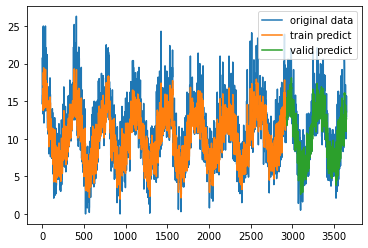

In [32]:
plt.plot(scaler.inverse_transform(data),label="original data")
plt.plot(trainPredictPlot,label="train predict")
plt.plot(testPredictPlot,label="valid predict")
plt.legend()
plt.show()